In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from data_cleansing.helpers.misc import get_file_name_initial_hw, get_initial_hw_datetime
from misc.csv_loader import load_recording

In [4]:
from enum import Enum, IntEnum


class Sensor(Enum):
    ACCELEROMETER = "acc"
    GYROSCOPE = "gyro"

In [5]:
dict_def = {"data_folder" : "../../../datasets/OCDetect/orig_data/", "first_hw_subfolder": "labels_first_handwashes/", "prefix": "OCDetect_", "meta_subfolder": "metadata/"}

In [6]:
filename = get_file_name_initial_hw("20", dict_def)

In [7]:
get_initial_hw_datetime("20", dict_def)

datetime.datetime(2022, 6, 7, 10, 33, 54)

In [8]:
initial_hw = pd.read_csv(dict_def["data_folder"]+"OCDetect_20/"+filename+".csv",  sep="\t")

In [9]:
initial_hw

,timestamp,acc x,acc y,acc z,gyro x,gyro y,gyro z,battery,user yes/no,compulsive,tense,urge
0,0.000000e+00,1.947151,-1.947151,8.507110,-0.179594,0.212581,0.127060,51.0,NaN,NaN,NaN,NaN
1,2.000000e+07,1.781895,-0.996328,8.622070,-0.179594,0.212581,0.127060,51.0,NaN,NaN,NaN,NaN
2,4.000000e+07,1.120869,-0.586780,9.053174,-0.179594,0.212581,0.127060,51.0,NaN,NaN,NaN,NaN
3,6.000000e+07,1.082549,-0.112566,9.438772,-0.179594,0.212581,0.127060,51.0,NaN,NaN,NaN,NaN
4,8.000000e+07,0.898132,0.146096,10.099798,-0.179594,0.212581,0.127060,51.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1594030,3.188060e+13,0.653840,2.979404,7.446116,2.056172,-0.355523,-0.175929,18.0,NaN,NaN,NaN,NaN
1594031,3.188062e+13,-1.621428,2.687212,7.728728,0.930958,0.739147,-2.090380,18.0,NaN,NaN,NaN,NaN
1594032,3.188064e+13,0.692161,3.774551,8.787327,2.828305,0.372628,-3.918088,18.0,NaN,NaN,NaN,NaN
1594033,3.188066e+13,-1.427432,4.572093,8.097562,3.426953,-0.568104,-2.895500,18.0,NaN,NaN,NaN,NaN


In [11]:
first_hw_csv = load_recording(dict_def["data_folder"] + dict_def["first_hw_subfolder"]+ "/labels_" + filename + ".csv", sep=",")


In [13]:
first_hw_csv

,Unnamed: 0,identifier,start,end,description
0,0,0,13013,15062,example


In [14]:
df = initial_hw[first_hw_csv["start"].values[0]:first_hw_csv["end"].values[0]]

In [16]:
len(df)

2049

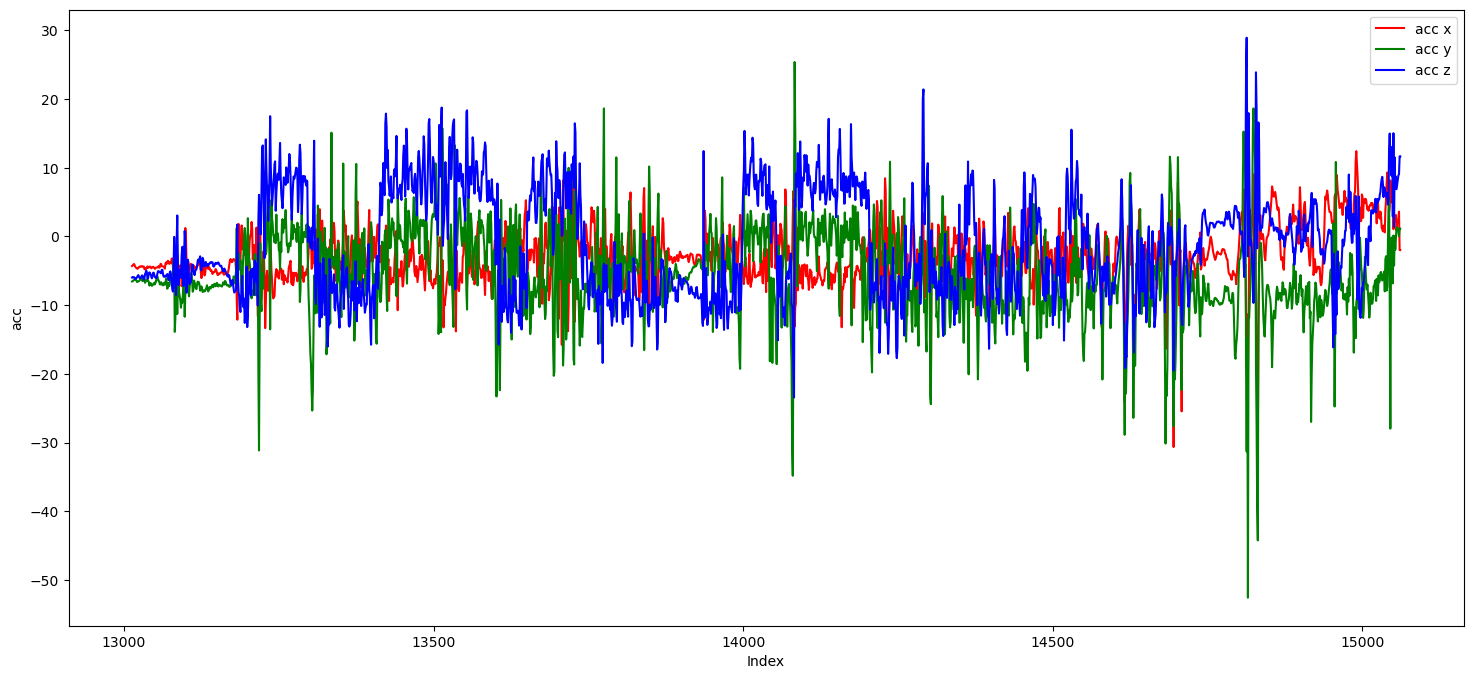

In [23]:
plt.figure(figsize=(18, 8))

sensor = Sensor.ACCELEROMETER
plt.plot(df.index, df[f"{sensor.value} x"], color="red", label=f"{sensor.value} x")
plt.plot(df.index, df[f"{sensor.value} y"], color="green", label=f"{sensor.value} y")
plt.plot(df.index, df[f"{sensor.value} z"], color="blue", label=f"{sensor.value} z")

plt.xlabel('Index')
plt.ylabel(f"{sensor.value}")
plt.title("")
plt.legend()

plt.show()